In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import scanpy as sc
import squidpy as sq
from scipy.interpolate import Rbf
from scipy.ndimage import gaussian_filter


/home/sadegh/python_projects/nanostring-cosmx-spatial-omics-modeling/venv/lib/python3.12/site-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/home/sadegh/python_projects/nanostring-cosmx-spatial-omics-modeling/venv/lib/python3.12/site-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/home/sadegh/python_projects/nanostring-cosmx-spatial-omics-modeling/venv/lib/python3.12/site-packages/scanpy/readwrite.py:16: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/home/sadegh/python_projects/nanostring-cosmx-spatial-omics-modeling/venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The

In [2]:
df = pd.read_csv('data/All_Metabolic_Tasks_All.csv')
df

/tmp/ipykernel_706251/1876497735.py:1: DtypeWarning: Columns (100) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/All_Metabolic_Tasks_All.csv')


,(R)-3-Hydroxybutanoate synthesis,ATP generation from glucose (hypoxic conditions) - glycolysis,ATP regeneration from glucose (normoxic conditions) - glycolysis + krebs cycle,Acetoacetate synthesis,Alanine degradation,Alanine synthesis,Arachidonate degradation,Arachidonate synthesis,Arginine degradation,Arginine synthesis,...,beta-Alanine synthesis,cis-vaccenic acid degradation,cis-vaccenic acid synthesis,gamma-Linolenate degradation,Subject_ID,Treatment_Status,Cell_ID,Cell_type,x,y
0,16.305230,16.305230,8.233311,16.305230,13.208966,16.305230,8.314007,10.011800,9.448215,16.305230,...,16.305230,13.349398,4.757782,13.349398,1182412B,Treated,6_304_TMA2_minimal,Pericyte,-477732.911567,8108.607254
1,10.107167,10.107167,6.498392,10.107167,9.868988,10.107167,7.943200,10.490911,6.798622,10.107167,...,10.107167,13.095068,4.347211,13.095068,1182412B,Treated,176_304_TMA2_minimal,a,-478326.646861,7624.071055
2,24.595199,24.595199,9.491334,24.595199,17.886077,24.595199,6.685069,9.491334,13.646356,24.595199,...,24.595199,12.474764,4.218371,12.474764,1182412B,Treated,279_304_TMA2_minimal,MMP9..Inflammatory.macrophage,-476937.244901,7373.053408
3,19.672966,19.672966,8.870183,19.672966,11.107895,19.672966,7.903884,10.161419,6.640972,19.672966,...,19.672966,13.006203,5.859884,13.006203,1182412B,Treated,332_304_TMA2_minimal,a,-477540.203234,7253.120074
4,23.447574,23.447574,9.578627,23.447574,10.566851,23.447574,7.433466,10.608757,8.708484,23.447574,...,23.447574,12.275789,5.206503,12.275789,1182412B,Treated,405_304_TMA2_minimal,a,-479148.557909,7052.038773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174742,26.734473,26.734473,11.973901,26.734473,17.412420,26.734473,10.580567,12.907711,12.001904,26.734473,...,26.734473,16.440388,6.066934,16.440388,120161,Untreated,329_384_TMA4_minimal,a,-149704.640502,-73713.752030
174743,26.146413,26.146413,10.905241,26.146413,15.807812,26.146413,8.737276,12.136838,11.951993,26.146413,...,26.146413,15.045136,6.813128,15.045136,120161,Untreated,619_384_TMA4_minimal,a,-150385.473835,-74134.177030
174744,23.304742,23.304742,10.002516,23.304742,11.274685,23.304742,8.352660,14.239334,6.436419,23.304742,...,23.304742,13.360357,5.270342,13.360357,120161,Untreated,706_384_TMA4_minimal,a,-149914.459342,-74248.559277
174745,22.844434,22.844434,10.184934,22.844434,12.684919,22.844434,8.947651,11.809174,9.561502,22.844434,...,22.844434,15.812878,5.116402,15.812878,120161,Untreated,739_384_TMA4_minimal,Enterocyte,-150503.057168,-74278.177030


In [3]:
df.columns

Index(['(R)-3-Hydroxybutanoate synthesis',
       'ATP generation from glucose (hypoxic conditions) - glycolysis',
       'ATP regeneration from glucose (normoxic conditions) - glycolysis + krebs cycle',
       'Acetoacetate synthesis', 'Alanine degradation', 'Alanine synthesis',
       'Arachidonate degradation', 'Arachidonate synthesis',
       'Arginine degradation', 'Arginine synthesis',
       ...
       'beta-Alanine synthesis', 'cis-vaccenic acid degradation',
       'cis-vaccenic acid synthesis', 'gamma-Linolenate degradation',
       'Subject_ID', 'Treatment_Status', 'Cell_ID', 'Cell_type', 'x', 'y'],
      dtype='object', length=106)

In [4]:
active_tasks = df.columns[:-4].tolist()

In [5]:
tasks = pd.read_csv('Task_Info_with_CRC_binary.csv')
tasks

,Task,System,Subsystem,Upregulated_in_CRC
0,(R)-3-Hydroxybutanoate synthesis,CARBOHYDRATES METABOLISM,KETOGENESIS,0
1,3'-Phospho-5'-adenylyl sulfate synthesis,NUCLEOTIDE METABOLISM,COFACTOR,0
2,AMP salvage from adenine,NUCLEOTIDE METABOLISM,SALVAGE,0
3,ATP generation from glucose (hypoxic condition...,ENERGY METABOLISM,ATP GENERATION,1
4,ATP regeneration from glucose (normoxic condit...,ENERGY METABOLISM,ATP GENERATION,0
...,...,...,...,...
213,Synthesis of androstenedione from cholesterol,HORMONES METABOLISM,ANDROGEN METABOLISM,0
214,Synthesis of estradiol-17beta (E2) from andros...,HORMONES METABOLISM,ESTROGEN METABOLISM,0
215,Synthesis of estrone (E1) from androstenedione,HORMONES METABOLISM,ESTROGEN METABOLISM,0
216,Synthesis of progesterone from cholesterol,HORMONES METABOLISM,PROGESTERONE METABOLISM,0


/tmp/ipykernel_706251/834215368.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_706251/834215368.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


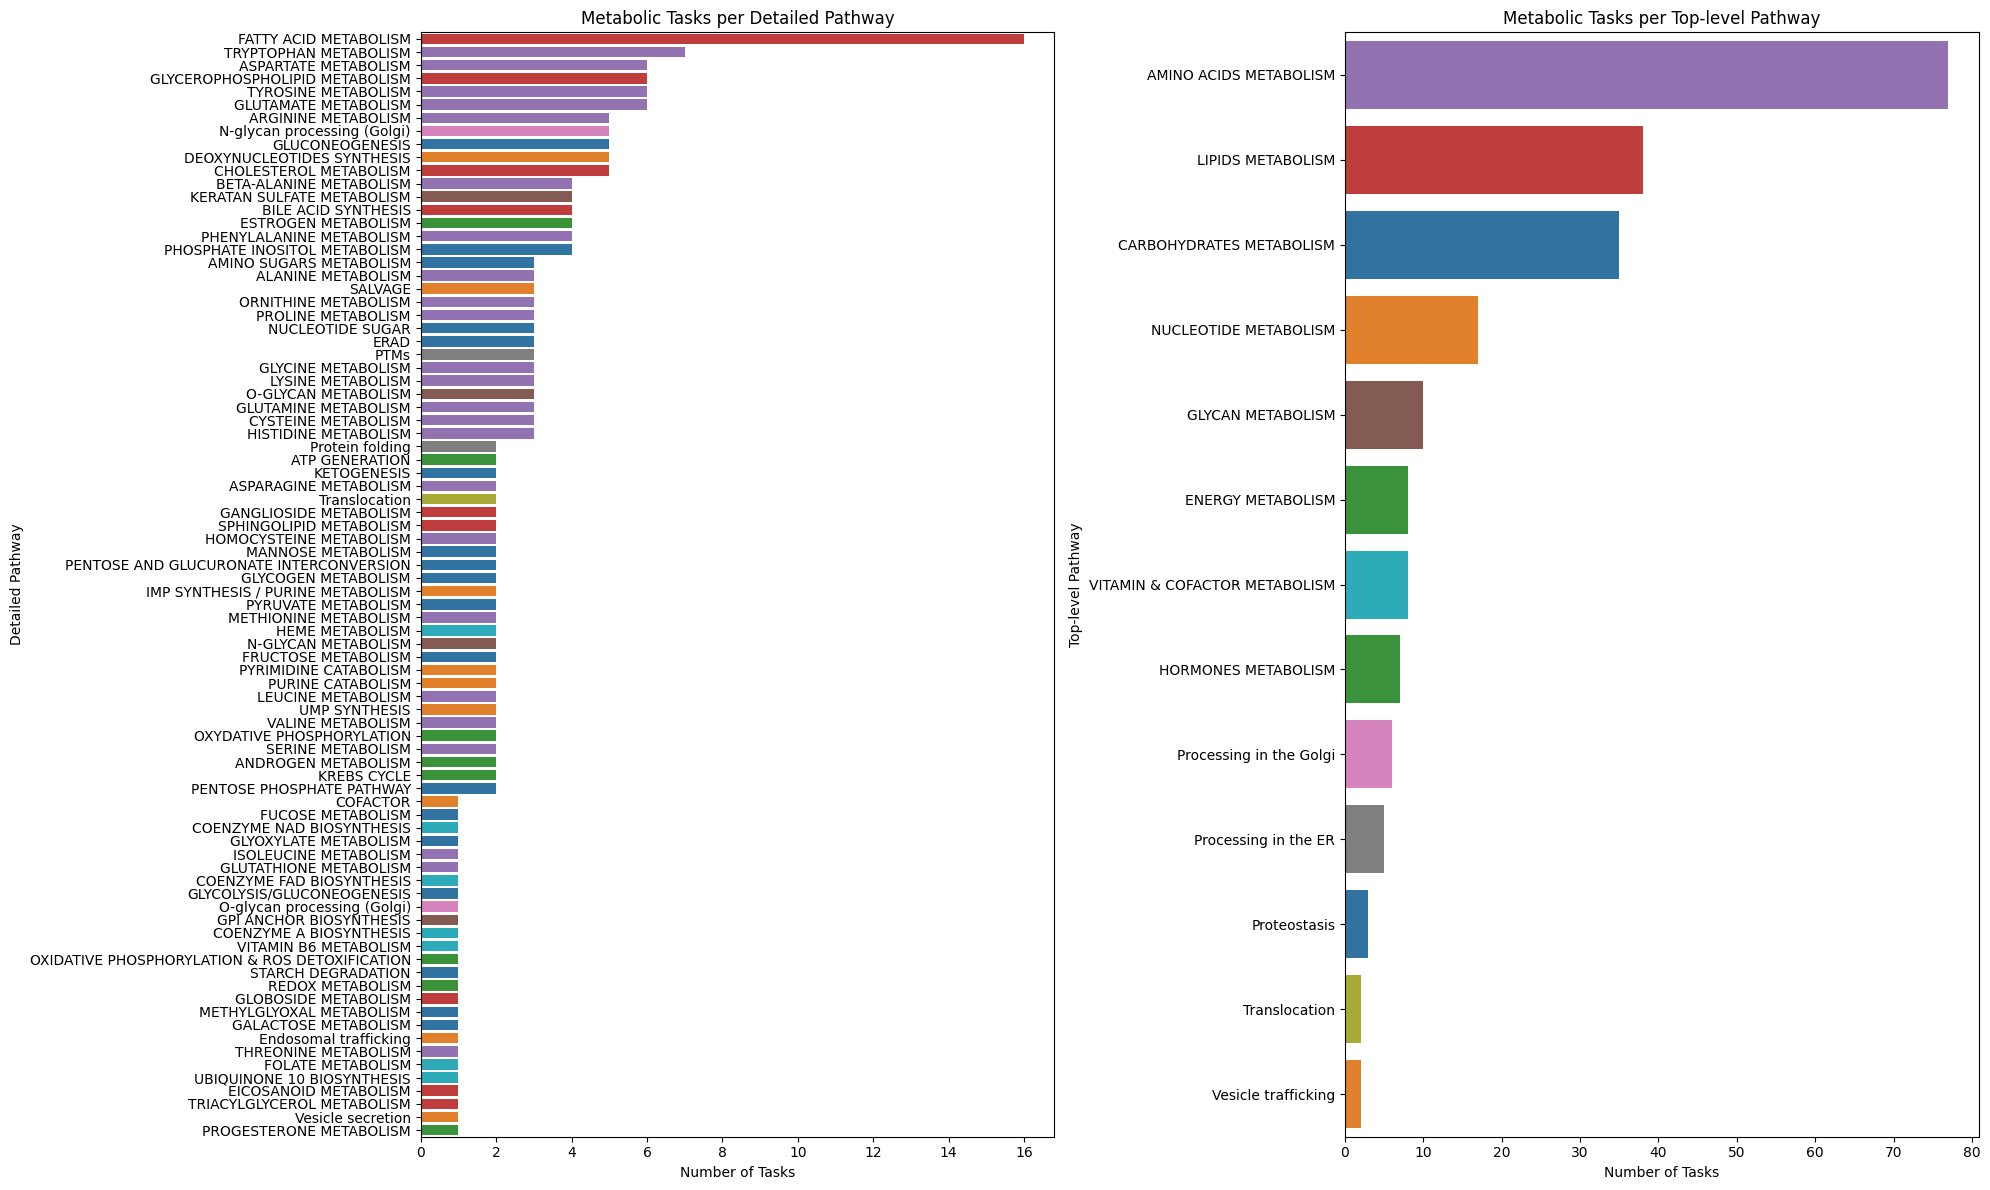

In [6]:
systems = tasks['System'].unique()
base_colors = sns.color_palette("tab10", len(systems))
system_color_map = {sys: base_colors[i] for i, sys in enumerate(systems)}

subsystems = tasks[['Subsystem', 'System']].drop_duplicates()
sub_color_map = {row['Subsystem']: system_color_map[row['System']]
                 for _, row in subsystems.iterrows()}

sub_counts = tasks['Subsystem'].value_counts()
sys_counts = tasks['System'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharex=False)

sns.barplot(
    y=sub_counts.index,
    x=sub_counts.values,
    palette=[sub_color_map[sub] for sub in sub_counts.index],
    ax=axes[0]
)
axes[0].set_title("Metabolic Tasks per Detailed Pathway")
axes[0].set_xlabel("Number of Tasks")
axes[0].set_ylabel("Detailed Pathway")

sns.barplot(
    y=sys_counts.index,
    x=sys_counts.values,
    palette=[system_color_map[sys] for sys in sys_counts.index],
    ax=axes[1]
)
axes[1].set_title("Metabolic Tasks per Top-level Pathway")
axes[1].set_xlabel("Number of Tasks")
axes[1].set_ylabel("Top-level Pathway")

plt.tight_layout()
plt.show()

In [7]:
task_filter = tasks[tasks['Task'].isin(active_tasks)]

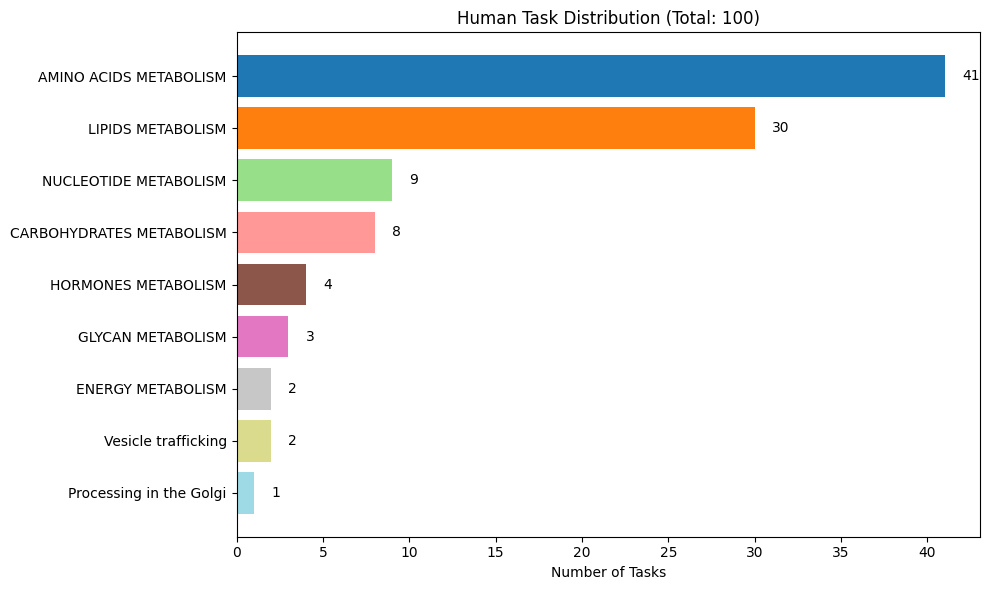

In [8]:
counts = task_filter['System'].value_counts()

plt.figure(figsize=(10, 6))

colors = plt.cm.tab20(np.linspace(0, 1, len(counts)))
bars = plt.barh(counts.index, counts.values, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,                      
        bar.get_y() + bar.get_height()/2,
        str(int(width)),
        va='center',
        fontsize=10
    )

plt.xlabel("Number of Tasks")
plt.title(f"Human Task Distribution (Total: {counts.sum()})")

plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

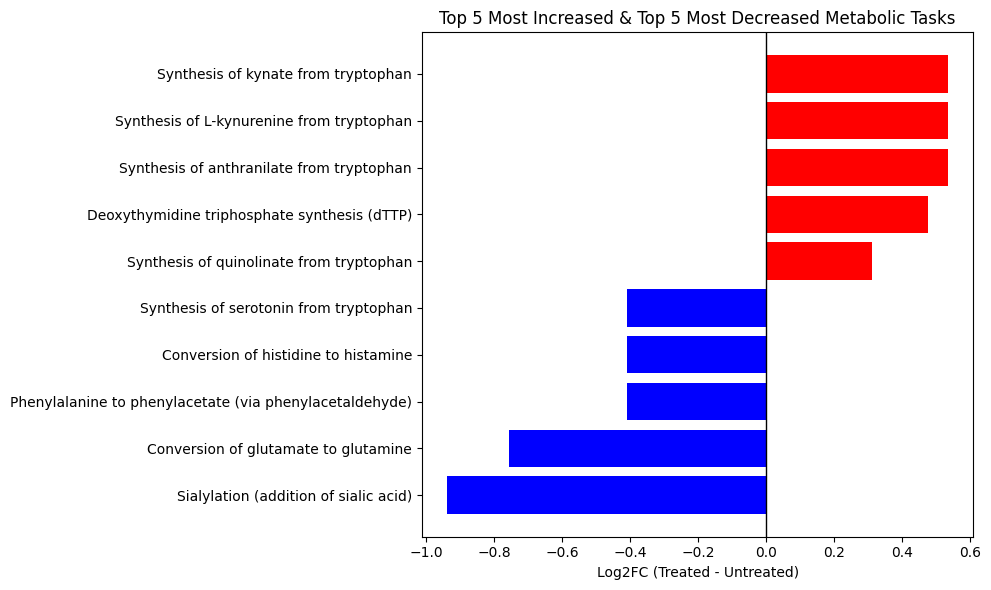

In [10]:
treated = df[df["Treatment_Status"] == "Treated"]
untreated = df[df["Treatment_Status"] == "Untreated"]

meta_cols = ["Subject_ID", "Treatment_Status", "Cell_ID", "Cell_type", "x", "y"]
task_cols = [c for c in df.columns if c not in meta_cols]

results = []

for task in task_cols:
    t_vals = treated[task].dropna()
    u_vals = untreated[task].dropna()
    
    stat, p = mannwhitneyu(t_vals, u_vals, alternative="two-sided")
    
    log2fc = np.log2(t_vals.median() / u_vals.median())
    
    results.append({
        "Task": task,
        "log2FC": log2fc,
        "p_value": p
    })

res = pd.DataFrame(results)

top_inc = res.sort_values("log2FC", ascending=False).head(5)
top_dec = res.sort_values("log2FC", ascending=True).head(5)

plot_df = pd.concat([top_dec, top_inc]).reset_index(drop=True)

plot_df = plot_df.sort_values("log2FC")

plt.figure(figsize=(10, 6))
colors = ["blue" if x < 0 else "red" for x in plot_df["log2FC"]]

plt.barh(plot_df["Task"], plot_df["log2FC"], color=colors)
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Log2FC (Treated - Untreated)")
plt.title("Top 5 Most Increased & Top 5 Most Decreased Metabolic Tasks")
plt.tight_layout()
plt.show()


### Split Violin Plot

Top tasks: ['(R)-3-Hydroxybutanoate synthesis', 'ATP generation from glucose (hypoxic conditions) - glycolysis', 'ATP regeneration from glucose (normoxic conditions) - glycolysis + krebs cycle', 'Acetoacetate synthesis', 'Alanine synthesis']


/tmp/ipykernel_706251/2542311215.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


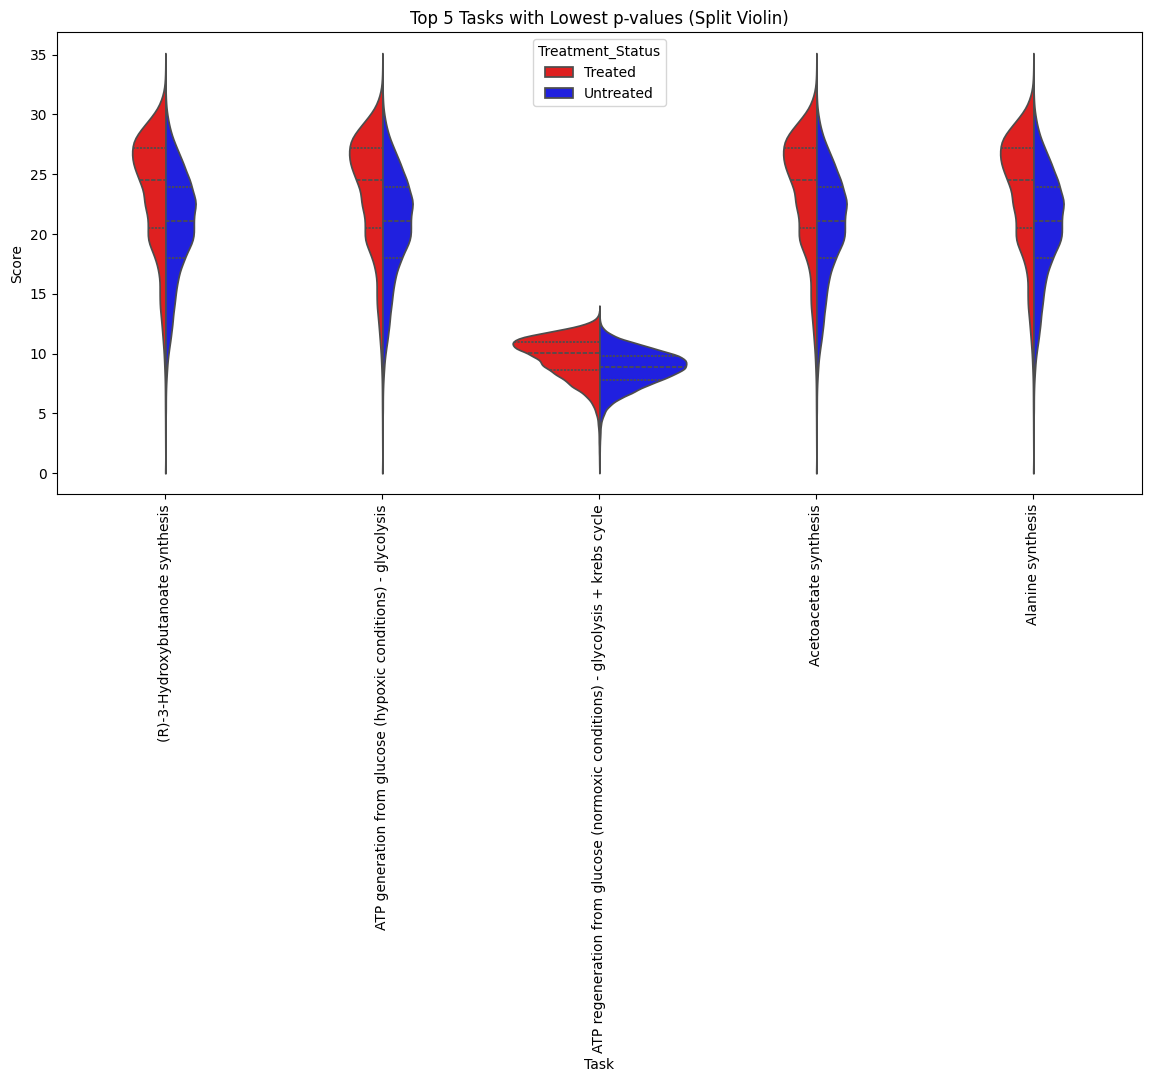

In [11]:
task_cols = [
    c for c in df.columns 
    if c not in ["Treatment_Status", "Subject_ID", "Cell_ID", "Cell_type"]
]


# Compute t-test p-values
stats = []

for task in task_cols:
    t_vals = df[df["Treatment_Status"] == "Treated"][task].dropna()
    u_vals = df[df["Treatment_Status"] == "Untreated"][task].dropna()

    if len(t_vals) < 3 or len(u_vals) < 3:
        continue

    stat, p = ttest_ind(t_vals, u_vals, equal_var=False, nan_policy="omit")
    stats.append((task, p))

pvals = pd.DataFrame(stats, columns=["Task", "p_value"])
pvals = pvals.sort_values("p_value", ascending=True)

# select top 5 tasks
top_tasks = pvals["Task"].head(5).tolist()
print("Top tasks:", top_tasks)

# Prepare melted dataframe only for top 5
df_melt = df.melt(
    id_vars="Treatment_Status",
    value_vars=top_tasks,
    var_name="Task",
    value_name="Score"
)

# 4Split violin plot (red=treated, blue=untreated)
plt.figure(figsize=(14, 6))
sns.violinplot(
    data=df_melt,
    x="Task",
    y="Score",
    hue="Treatment_Status",
    split=True,
    palette={"Treated": "red", "Untreated": "blue"},
    inner="quartile",
    cut=0
)

plt.xticks(rotation=90)
plt.title("Top 5 Tasks with Lowest p-values (Split Violin)")
plt.tight_layout()
plt.show()


Top tasks: ['(R)-3-Hydroxybutanoate synthesis', 'ATP generation from glucose (hypoxic conditions) - glycolysis', 'ATP regeneration from glucose (normoxic conditions) - glycolysis + krebs cycle', 'Acetoacetate synthesis', 'Alanine synthesis']


/tmp/ipykernel_706251/3026803835.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


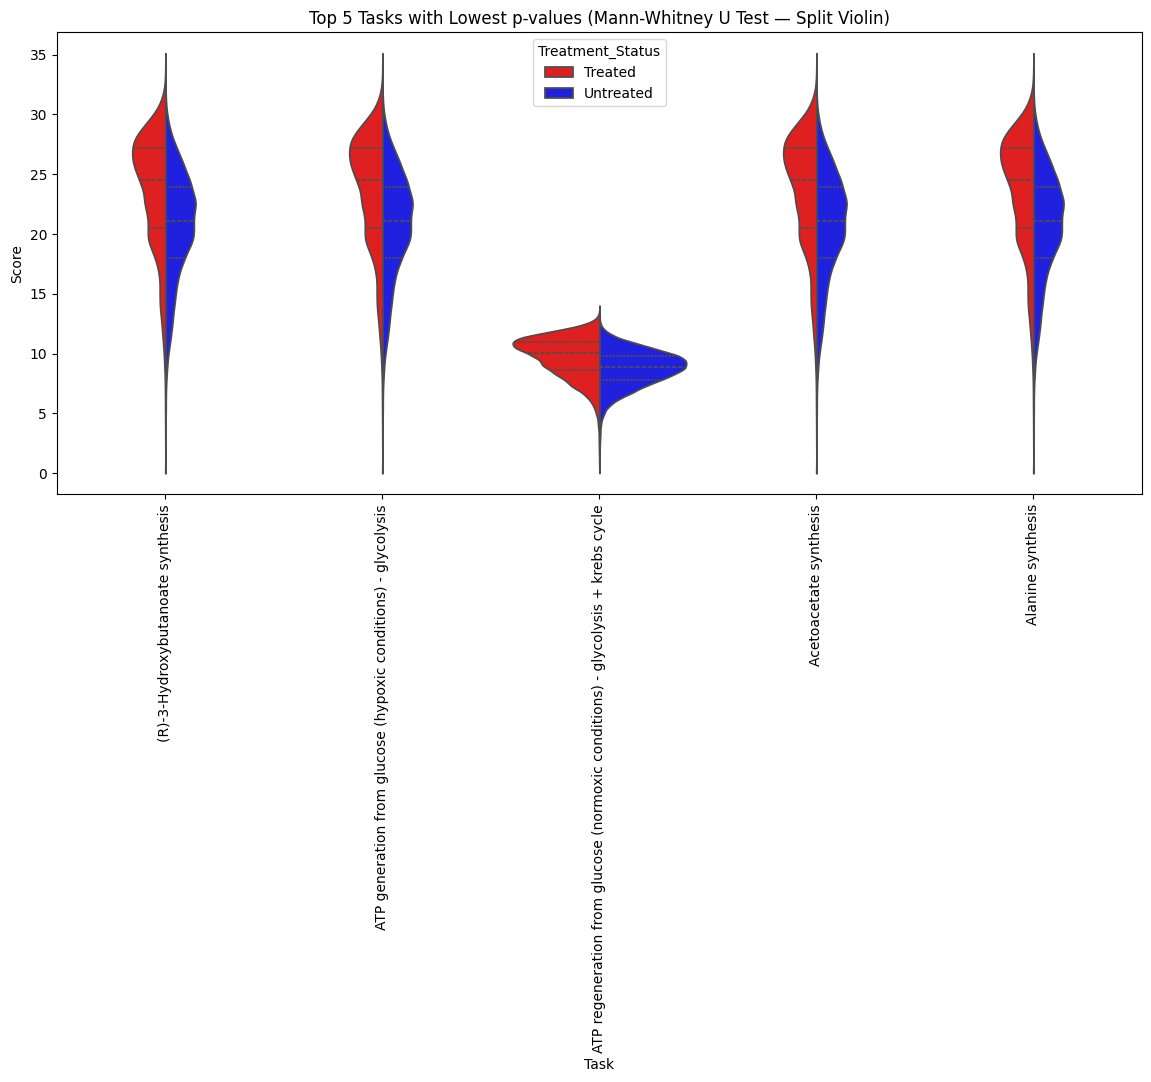

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# انتخاب ستون‌های تسک
task_cols = [
    c for c in df.columns 
    if c not in ["Treatment_Status", "Subject_ID", "Cell_ID", "Cell_type"]
]

stats = []

for task in task_cols:
    t_vals = df[df["Treatment_Status"] == "Treated"][task].dropna()
    u_vals = df[df["Treatment_Status"] == "Untreated"][task].dropna()

    if len(t_vals) < 3 or len(u_vals) < 3:
        continue

    # 🟦 Mann–Whitney U test
    stat, p = mannwhitneyu(t_vals, u_vals, alternative="two-sided")
    stats.append((task, p))

# dataframe از p-values
pvals = pd.DataFrame(stats, columns=["Task", "p_value"])
pvals = pvals.sort_values("p_value", ascending=True)

# انتخاب 5 تسک
top_tasks = pvals["Task"].head(5).tolist()
print("Top tasks:", top_tasks)

# melt برای ویولین‌پلات
df_melt = df.melt(
    id_vars="Treatment_Status",
    value_vars=top_tasks,
    var_name="Task",
    value_name="Score"
)

# ویولین پلات
plt.figure(figsize=(14, 6))
sns.violinplot(
    data=df_melt,
    x="Task",
    y="Score",
    hue="Treatment_Status",
    split=True,
    palette={"Treated": "red", "Untreated": "blue"},
    inner="quartile",
    cut=0
)

plt.xticks(rotation=90)
plt.title("Top 5 Tasks with Lowest p-values (Mann-Whitney U Test — Split Violin)")
plt.tight_layout()
plt.show()


In [12]:
mean_task_ct = (
    df.groupby(["Cell_type", "Treatment_Status"])[task_cols]
      .mean()
      .reset_index()
)
mean_task_ct.head()

,Cell_type,Treatment_Status,(R)-3-Hydroxybutanoate synthesis,ATP generation from glucose (hypoxic conditions) - glycolysis,ATP regeneration from glucose (normoxic conditions) - glycolysis + krebs cycle,Acetoacetate synthesis,Alanine degradation,Alanine synthesis,Arachidonate degradation,Arachidonate synthesis,...,Uridine triphosphate synthesis (UTP),Valine degradation,Vesicle secretion,beta-Alanine degradation,beta-Alanine synthesis,cis-vaccenic acid degradation,cis-vaccenic acid synthesis,gamma-Linolenate degradation,x,y
0,Adult.Glia,Treated,22.927348,22.927348,9.642618,22.927348,14.117175,22.927348,7.821561,11.117249,...,12.368432,12.161785,3.915915,13.767426,22.927348,12.326025,5.446355,12.326025,-181777.733132,12130.895005
1,Adult.Glia,Untreated,24.200598,24.200598,10.049520,24.200598,14.593854,24.200598,7.998741,11.386113,...,13.019471,12.594169,3.850444,14.278977,24.200598,13.028340,5.537664,13.028340,-227354.507574,43927.099172
2,B.cells,Treated,21.372199,21.372199,7.959914,21.372199,12.987686,21.372199,5.233728,8.902848,...,14.014285,11.679254,3.790092,13.193005,21.372199,11.976100,3.859668,11.976100,-166679.996265,2192.503064
3,B.cells,Untreated,19.908573,19.908573,8.297297,19.908573,13.168637,19.908573,6.640306,9.122976,...,7.533222,11.508560,3.083585,12.041554,19.908573,12.852352,4.676893,12.852352,-332905.199594,-20911.592796
4,CD8.T,Treated,24.943588,24.943588,10.258337,24.943588,13.407378,24.943588,8.044880,11.590478,...,12.551383,11.396157,4.093738,13.236179,24.943588,13.090776,5.773746,13.090776,-251527.377007,443.754729


In [13]:
df_group = mean_task_ct.groupby(["Cell_type", "Treatment_Status"]).mean()
df_group

(R)-3-Hydroxybutanoate synthesis  \
Cell_type        Treatment_Status                                     
Adult.Glia       Treated                                  22.927348   
                 Untreated                                24.200598   
B.cells          Treated                                  21.372199   
                 Untreated                                19.908573   
CD8.T            Treated                                  24.943588   
...                                                             ...   
myofibroblast    Untreated                                19.835697   
pDC              Treated                                  23.228299   
                 Untreated                                20.418308   
venous.capillary Treated                                  21.661685   
                 Untreated                                20.936357   

                                   ATP generation from glucose (hypoxic conditions) - glycolysis  \
Cell_type        Treatment_Status                                                                  
Adult.Glia       Treated                                                   22.927348               
                 Untreated                                                 24.200598               
B.cells          Treated                                                   21.372199               
                 Untreated                                                 19.908573               
CD8.T            Treated                                                   24.943588               
...                                                                              ...               
myofibroblast    Untreated                                                 19.835697               
pDC              Treated                                                   23.228299               
                 Untreated                                                 20.418308               
venous.capillary Treated                                                   21.661685               
                 Untreated                                                 20.936357               

                                   ATP regeneration from glucose (normoxic conditions) - glycolysis + krebs cycle  \
Cell_type        Treatment_Status                                                                                   
Adult.Glia       Treated                                                    9.642618                                
                 Untreated                                                 10.049520                                
B.cells          Treated                                                    7.959914                                
                 Untreated                                                  8.297297                                
CD8.T            Treated                                                   10.258337                                
...                                                                              ...                                
myofibroblast    Untreated                                                  8.178395                                
pDC              Treated                                                    8.821893                                
                 Untreated                                                  8.274996                                
venous.capillary Treated                                                    8.723659                                
                 Untreated                                                  8.420465                                

                                   Acetoacetate synthesis  \
Cell_type        Treatment_Status                           
Adult.Glia       Treated                        22.927348   
                 Untreated                      24.200598   
B.cells          Treated                    

In [14]:
valid_tasks = [t for t in tasks['Task'] if t in df.columns]
valid_tasks

['(R)-3-Hydroxybutanoate synthesis',
 'ATP generation from glucose (hypoxic conditions) - glycolysis',
 'ATP regeneration from glucose (normoxic conditions) - glycolysis + krebs cycle',
 'Acetoacetate synthesis',
 'Alanine degradation',
 'Alanine synthesis',
 'Arachidonate degradation',
 'Arachidonate synthesis',
 'Arginine degradation',
 'Arginine synthesis',
 'Asparagine degradation',
 'Asparagine synthesis',
 'Aspartate degradation',
 'Aspartate synthesis',
 'Cardiolipin synthesis',
 'Ceramide synthesis',
 'Conversion of glutamate to glutamine',
 'Conversion of histidine to histamine',
 'Cysteine degradation',
 'Cytidine triphosphate synthesis (CTP)',
 'Deoxyadenosine triphosphate synthesis (dATP)',
 'Deoxycytidine triphosphate synthesis (dCTP)',
 'Deoxyguanosine triphosphate synthesis (dGTP)',
 'Deoxythymidine triphosphate synthesis (dTTP)',
 'Deoxyuridine triphosphate synthesis (dUTP)',
 'Elaidate degradation',
 'Elaidate synthesis',
 'Gluconeogenesis from Alanine',
 'Gluconeogene

In [16]:
results = []
for task in valid_tasks:
    for ct in df["Cell_type"].unique():
        g1 = df[(df.Cell_type==ct)&(df.Treatment_Status=="Treated")][task]
        g2 = df[(df.Cell_type==ct)&(df.Treatment_Status=="Untreated")][task]
        stat,p = mannwhitneyu(g1,g2,alternative="two-sided")
        results.append([ct,task,p])


In [17]:
results_df = pd.DataFrame(results, columns=["Cell_type","Task","p_value"])
results_df

,Cell_type,Task,p_value
0,Pericyte,(R)-3-Hydroxybutanoate synthesis,4.360489e-09
1,a,(R)-3-Hydroxybutanoate synthesis,3.016096e-18
2,MMP9..Inflammatory.macrophage,(R)-3-Hydroxybutanoate synthesis,9.135756e-19
3,MPO..mono.neutrophil,(R)-3-Hydroxybutanoate synthesis,1.000000e+00
4,c,(R)-3-Hydroxybutanoate synthesis,8.554922e-10
...,...,...,...
3895,B.cells,Synthesis of testosterone from androstenedione,4.352793e-01
3896,Plasma.cell,Synthesis of testosterone from androstenedione,5.619719e-08
3897,b,Synthesis of testosterone from androstenedione,6.558350e-17
3898,Paneth,Synthesis of testosterone from androstenedione,9.793489e-01


In [ ]:
# results_df.to_csv("Task_celltype_pvalues.csv", index=False)

In [18]:
df_sig = results_df[results_df.p_value < 0.05]
df_sig

,Cell_type,Task,p_value
0,Pericyte,(R)-3-Hydroxybutanoate synthesis,4.360489e-09
1,a,(R)-3-Hydroxybutanoate synthesis,3.016096e-18
2,MMP9..Inflammatory.macrophage,(R)-3-Hydroxybutanoate synthesis,9.135756e-19
4,c,(R)-3-Hydroxybutanoate synthesis,8.554922e-10
6,arterial.capillary,(R)-3-Hydroxybutanoate synthesis,1.658094e-03
...,...,...,...
3889,Lymphoid.DC,Synthesis of testosterone from androstenedione,4.585287e-02
3890,CLP,Synthesis of testosterone from androstenedione,2.491787e-06
3891,CD8.T,Synthesis of testosterone from androstenedione,1.074869e-04
3896,Plasma.cell,Synthesis of testosterone from androstenedione,5.619719e-08


In [19]:
df_sig.groupby("Cell_type")["Task"].count().sort_values(ascending=False)

Cell_type
EECs                             98
a                                98
c                                97
TA                               94
b                                91
MMP9..Inflammatory.macrophage    91
NK.cell                          84
d                                84
CD8.T                            83
Enterocyte                       82
cDC                              81
Monocytes                        77
Colonocyte                       77
Tuft                             76
Paneth                           75
arterial.capillary               74
Glia                             71
Pericyte                         71
Plasma.cell                      68
Goblet.cell                      66
CLDN10..cells                    66
venous.capillary                 61
Microfold.cell                   61
myofibroblast                    58
Mast.cell                        50
Mesothelium                      42
Lymphoid.DC                      40
CLP               

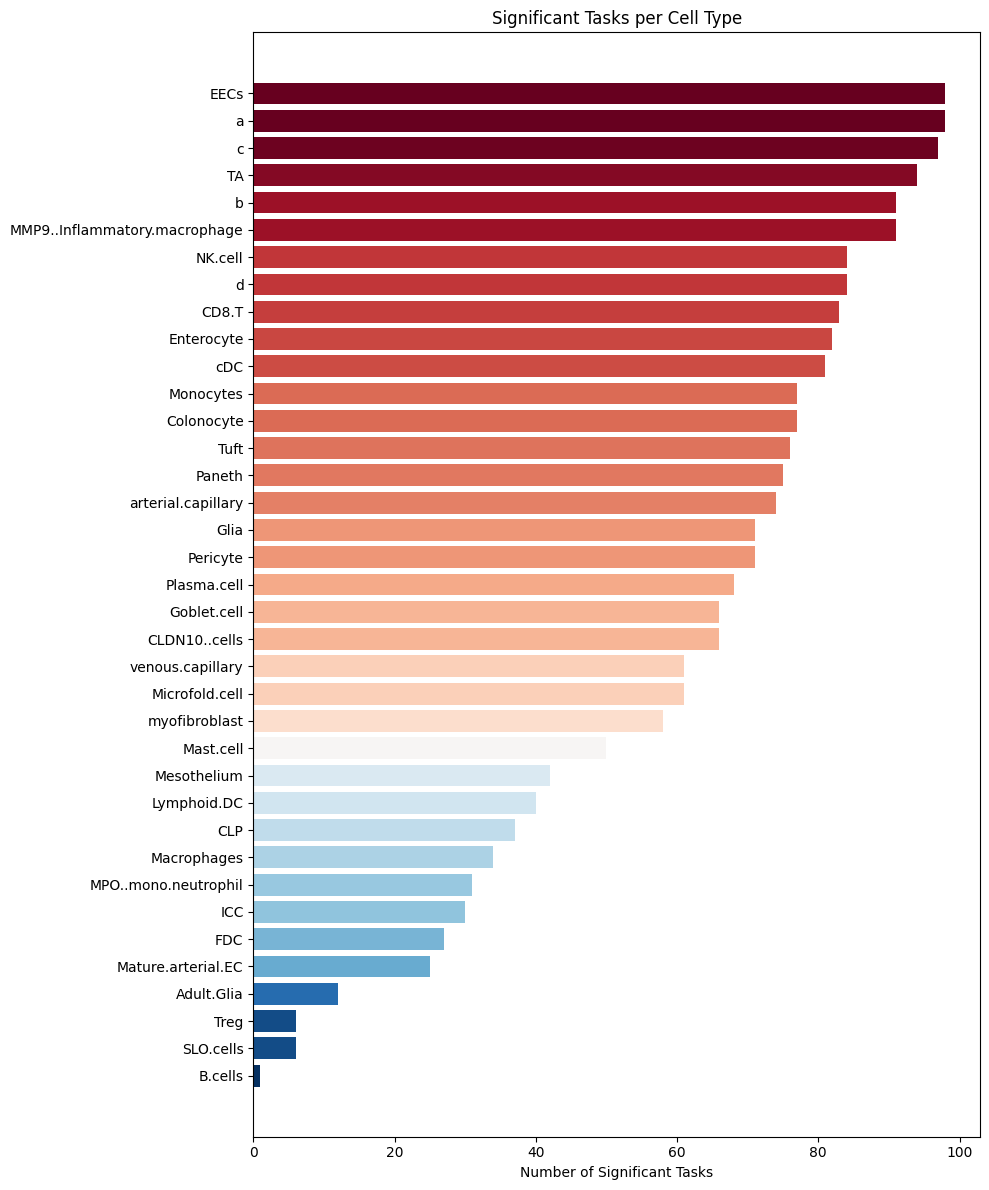

In [20]:
counts = df_sig.groupby("Cell_type")["Task"].count().sort_values(ascending=False)

norm = (counts - counts.min()) / (counts.max() - counts.min())
colors = plt.cm.RdBu_r(norm)

plt.figure(figsize=(10, 12))
plt.barh(counts.index, counts.values, color=colors)
plt.gca().invert_yaxis()  
plt.xlabel("Number of Significant Tasks")
plt.title("Significant Tasks per Cell Type")
plt.tight_layout()
plt.show()

### Spatial Analysis

In [ ]:
from pathlib import Path

RESULTS_DIR = Path().resolve().parent / "results"

patient_sizes = []

for folder in RESULTS_DIR.iterdir():
    if not folder.is_dir():
        continue
    base_path = folder / f"{folder.name}.h5ad"
    if not base_path.exists():
        continue
    
    adata = sc.read_h5ad(base_path)
    patient_sizes.append((folder.name, adata.n_obs))

best_patient = sorted(patient_sizes, key=lambda x: x[1], reverse=True)[0][0]
best_patient = '1216278B'

In [ ]:
patient_dir = RESULTS_DIR / best_patient

adata = sc.read_h5ad(patient_dir / f"{best_patient}.h5ad")
adata_tasks = sc.read_h5ad(patient_dir / f"{best_patient}_metabolic_tasks.h5ad")
adata_react = sc.read_h5ad(patient_dir / f"{best_patient}_reactions.h5ad")

In [ ]:
adata_tasks

In [ ]:
sc.settings.set_figure_params(dpi=160, facecolor="white")

sc.pl.spatial(
    adata,
    color="cell_type",
    spot_size=300,
    frameon=False,
    alpha=0.95,
    cmap=None,
    legend_loc="right margin",
    title="Spatial Cell Type Map"
)

In [ ]:
x = adata.obsm["spatial"][:,0]
y = adata.obsm["spatial"][:,1]
ct = adata.obs["cell_type"].astype("category")

# Factorizing cell types into integers for coloring
ct_codes, uniques = pd.factorize(ct)

plt.figure(figsize=(8,10))

hb = plt.hexbin(
    x, y,
    C=ct_codes,
    reduce_C_function=np.mean,
    gridsize=70,
    cmap="tab20",
    linewidths=0
)

plt.gca().invert_yaxis()
plt.title("Spatial Cell-Type Hexmap")
plt.xlabel(""); plt.ylabel("")
plt.show()

# legend
for i, u in enumerate(uniques):
    plt.scatter([], [], color=plt.get_cmap("tab20")(i), label=u, s=40)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="Cell Types")
plt.show()


In [ ]:
feature = "(R)-3-Hydroxybutanoate synthesis"


plt.figure(figsize=(8,10))
plt.scatter(
    x,
    y,
    c=adata_tasks[:, feature].X.toarray().flatten()
       if hasattr(adata_tasks[:, feature].X, "toarray")
       else adata_tasks[:, feature].X,
    cmap="coolwarm",
    s=8
)
plt.gca().invert_yaxis()
plt.colorbar(label=feature)
plt.title(f"Spatial Intensity Map — {feature}")
plt.show()


In [ ]:
coords = adata_tasks.obsm["spatial"]
x = coords[:,0]
y = coords[:,1]

# expression vector
vals = adata_tasks[:, feature].X
vals = vals.toarray().flatten() if hasattr(vals, "toarray") else vals

# normalize 0..1
vals_norm = (vals - vals.min()) / (vals.max() - vals.min() + 1e-6)

# Interpolation (RBF)
rbf = Rbf(x, y, vals_norm, function='thin_plate')

# grid for continuous field
gx = np.linspace(x.min(), x.max(), 250)
gy = np.linspace(y.min(), y.max(), 250)
GX, GY = np.meshgrid(gx, gy)

GZ = rbf(GX, GY)
GZ = gaussian_filter(GZ, sigma=2)   # smooth for nicer gradients

# Gradient field
Fx, Fy = np.gradient(GZ)

# Mask on hotspots (top 10%)
mask = GZ > np.percentile(GZ, 90)
Fx_masked = Fx * mask
Fy_masked = Fy * mask

# Plot
plt.figure(figsize=(11,11))

# background expression map
plt.imshow(
    GZ,
    extent=[x.min(), x.max(), y.min(), y.max()],
    origin='lower',
    cmap="coolwarm",
    alpha=0.75
)

# streamlines
plt.streamplot(
    gx, gy,
    Fx_masked, Fy_masked,
    density=1.2,
    color="black",
    arrowsize=1.5,
    linewidth=1.2
)

plt.gca().invert_yaxis()

plt.title(f"Spatial Flux Streamlines — {feature}", fontsize=20)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label=feature)

plt.show()
